# Resnet50 Model

### <u>Action Classes - 20</u>

In [1]:
from keras import models
from keras.layers import Dense,Flatten
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt

from keras.applications import resnet

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2022-08-31 17:12:32.858890: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 17:12:32.892523: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 17:12:32.892700: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


<img src="https://upload.wikimedia.org/wikipedia/commons/9/98/ResNet50.png" />

## Dataset

In [3]:
from keras.preprocessing.image import ImageDataGenerator

dataset_path = "./frames/"
# will contain the categories in respective folders

# Data generators
# train_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_datagen = ImageDataGenerator(dtype = 'float32', preprocessing_function=tf.keras.applications.resnet.preprocess_input, validation_split=0.2)

In [4]:
image_size = (224,224)
batch_size = 10

train_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "categorical",
    subset = "training"
)

validation_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "categorical",
    subset = "validation"
)

test_batches = train_datagen.flow_from_directory(
    dataset_path,
    target_size = image_size,
    batch_size = batch_size,
    class_mode = "categorical",
    subset = "validation"
)

Found 5118 images belonging to 20 classes.
Found 1270 images belonging to 20 classes.
Found 1270 images belonging to 20 classes.


In [5]:
train_batches.class_indices

{'ApplyLipstick': 0,
 'Archery': 1,
 'BabyCrawling': 2,
 'Basketball': 3,
 'Biking': 4,
 'Diving': 5,
 'Fencing': 6,
 'IceDancing': 7,
 'Kayaking': 8,
 'MilitaryParade': 9,
 'PizzaTossing': 10,
 'PullUps': 11,
 'ShavingBeard': 12,
 'SkateBoarding': 13,
 'SumoWrestling': 14,
 'Surfing': 15,
 'TennisSwing': 16,
 'Typing': 17,
 'WritingOnBoard': 18,
 'YoYo': 19}

In [6]:
from matplotlib import pyplot as plt

def plot_images(images_arr):
    fig, axes = plt.subplots(1,10)
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

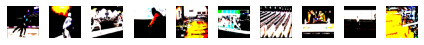

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [7]:
imgs, labels = train_batches[0]
plot_images(imgs)
print(labels[:10])

In [8]:
resnet50modeltop = resnet.ResNet50(include_top=True,
                   input_shape=(224,224,3),
                   pooling='avg',
                   weights='imagenet')

for (i,layer) in enumerate(resnet50modeltop.layers):
    print((i, layer.name, layer.output_shape))

2022-08-31 17:12:33.838581: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-08-31 17:12:33.839121: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 17:12:33.839276: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-31 17:12:33.839376: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

(0, 'input_1', [(None, 224, 224, 3)])
(1, 'conv1_pad', (None, 230, 230, 3))
(2, 'conv1_conv', (None, 112, 112, 64))
(3, 'conv1_bn', (None, 112, 112, 64))
(4, 'conv1_relu', (None, 112, 112, 64))
(5, 'pool1_pad', (None, 114, 114, 64))
(6, 'pool1_pool', (None, 56, 56, 64))
(7, 'conv2_block1_1_conv', (None, 56, 56, 64))
(8, 'conv2_block1_1_bn', (None, 56, 56, 64))
(9, 'conv2_block1_1_relu', (None, 56, 56, 64))
(10, 'conv2_block1_2_conv', (None, 56, 56, 64))
(11, 'conv2_block1_2_bn', (None, 56, 56, 64))
(12, 'conv2_block1_2_relu', (None, 56, 56, 64))
(13, 'conv2_block1_0_conv', (None, 56, 56, 256))
(14, 'conv2_block1_3_conv', (None, 56, 56, 256))
(15, 'conv2_block1_0_bn', (None, 56, 56, 256))
(16, 'conv2_block1_3_bn', (None, 56, 56, 256))
(17, 'conv2_block1_add', (None, 56, 56, 256))
(18, 'conv2_block1_out', (None, 56, 56, 256))
(19, 'conv2_block2_1_conv', (None, 56, 56, 64))
(20, 'conv2_block2_1_bn', (None, 56, 56, 64))
(21, 'conv2_block2_1_relu', (None, 56, 56, 64))
(22, 'conv2_block2_2_c

In [9]:
resnet50model = resnet.ResNet50(include_top=False,
                   input_shape=(224,224,3),
                   pooling='avg',classes=20,
                   weights='imagenet')

    
for (i,layer) in enumerate(resnet50model.layers):
    layer.trainable = False
    print((i, layer.name, layer.output_shape, layer.trainable))

(0, 'input_2', [(None, 224, 224, 3)], False)
(1, 'conv1_pad', (None, 230, 230, 3), False)
(2, 'conv1_conv', (None, 112, 112, 64), False)
(3, 'conv1_bn', (None, 112, 112, 64), False)
(4, 'conv1_relu', (None, 112, 112, 64), False)
(5, 'pool1_pad', (None, 114, 114, 64), False)
(6, 'pool1_pool', (None, 56, 56, 64), False)
(7, 'conv2_block1_1_conv', (None, 56, 56, 64), False)
(8, 'conv2_block1_1_bn', (None, 56, 56, 64), False)
(9, 'conv2_block1_1_relu', (None, 56, 56, 64), False)
(10, 'conv2_block1_2_conv', (None, 56, 56, 64), False)
(11, 'conv2_block1_2_bn', (None, 56, 56, 64), False)
(12, 'conv2_block1_2_relu', (None, 56, 56, 64), False)
(13, 'conv2_block1_0_conv', (None, 56, 56, 256), False)
(14, 'conv2_block1_3_conv', (None, 56, 56, 256), False)
(15, 'conv2_block1_0_bn', (None, 56, 56, 256), False)
(16, 'conv2_block1_3_bn', (None, 56, 56, 256), False)
(17, 'conv2_block1_add', (None, 56, 56, 256), False)
(18, 'conv2_block1_out', (None, 56, 56, 256), False)
(19, 'conv2_block2_1_conv', (No

In [10]:
model = models.Sequential()

flatten = Flatten()  # adding Flatten Layer
dense_layer_1 = Dense(32, activation='relu')  # Adding a Dense layer
prediction_layer = Dense(20, activation='softmax')

model.add(resnet50model)
model.add(flatten)
model.add(dense_layer_1)
model.add(prediction_layer)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 dense_1 (Dense)             (None, 20)                660       
                                                                 
Total params: 23,653,940
Trainable params: 66,228
Non-trainable params: 23,587,712
_________________________________________________________________


In [11]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [12]:
model.save("./models/action-class-20-resnet50.h5")

In [13]:
fit = model.fit(train_batches, epochs=20, validation_data=validation_batches)

Epoch 1/20


2022-08-31 17:12:40.460184: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8401
2022-08-31 17:12:40.782227: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


512/512 [==============================] - 60s 110ms/step - loss: 0.5186 - accuracy: 0.8562 - val_loss: 0.3640 - val_accuracy: 0.8748
Epoch 2/20
512/512 [==============================] - 56s 109ms/step - loss: 0.0616 - accuracy: 0.9865 - val_loss: 0.3804 - val_accuracy: 0.8764
Epoch 3/20
512/512 [==============================] - 56s 110ms/step - loss: 0.0207 - accuracy: 0.9971 - val_loss: 0.3486 - val_accuracy: 0.8866
Epoch 4/20
512/512 [==============================] - 59s 116ms/step - loss: 0.0098 - accuracy: 0.9986 - val_loss: 0.3143 - val_accuracy: 0.9016
Epoch 5/20
512/512 [==============================] - 62s 120ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.3115 - val_accuracy: 0.9063
Epoch 6/20
512/512 [==============================] - 72s 141ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.2999 - val_accuracy: 0.9047
Epoch 7/20
512/512 [==============================] - 75s 147ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3204 - val_accuracy: 0.9

In [14]:
model.save("./models/action-class-20-trained-resnet50.h5")

## Evaluate and Predict

In [15]:
model = models.load_model("./models/action-class-20-trained-resnet50.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 32)                65568     
                                                                 
 dense_1 (Dense)             (None, 20)                660       
                                                                 
Total params: 23,653,940
Trainable params: 66,228
Non-trainable params: 23,587,712
_________________________________________________________________


In [16]:
model.evaluate(test_batches)

127/127 [==============================] - 17s 121ms/step - loss: 0.3803 - accuracy: 0.9094


[0.3802684247493744, 0.9094488024711609]

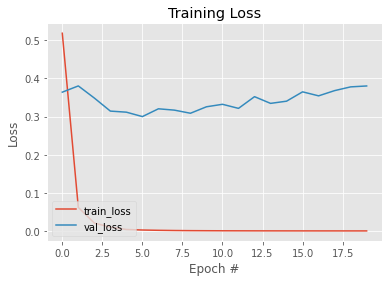

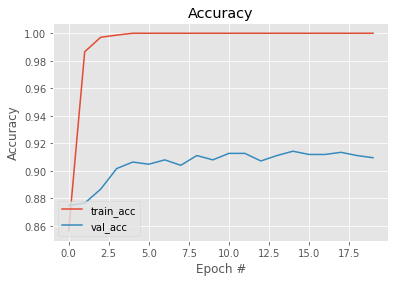

In [17]:
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, 20), fit.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), fit.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend(loc="lower left")
plt.show()

plt.plot(np.arange(0, 20), fit.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), fit.history["val_accuracy"], label="val_acc")
plt.title("Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="lower left")
plt.show()

In [18]:
print("Avg Val Acc: " + str(sum(fit.history["val_accuracy"])/20*100))
print("Avg Val Loss: " + str(sum(fit.history["val_loss"])/20*100))

Avg Val Acc: 90.48031389713287
Avg Val Loss: 34.083402305841446
